In [1]:
import pandas as pd 
import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Groceries.csv")
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [6]:
data.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [7]:
data = pd.get_dummies(data,dtype=int)
data.head()

,Member_number,Date_01-01-2014,Date_01-01-2015,Date_01-02-2014,Date_01-02-2015,Date_01-03-2014,Date_01-03-2015,Date_01-04-2014,Date_01-04-2015,Date_01-05-2014,...,itemDescription_turkey,itemDescription_vinegar,itemDescription_waffles,itemDescription_whipped/sour cream,itemDescription_whisky,itemDescription_white bread,itemDescription_white wine,itemDescription_whole milk,itemDescription_yogurt,itemDescription_zwieback
0,1808,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
data.describe()

,Member_number,Date_01-01-2014,Date_01-01-2015,Date_01-02-2014,Date_01-02-2015,Date_01-03-2014,Date_01-03-2015,Date_01-04-2014,Date_01-04-2015,Date_01-05-2014,...,itemDescription_turkey,itemDescription_vinegar,itemDescription_waffles,itemDescription_whipped/sour cream,itemDescription_whisky,itemDescription_white bread,itemDescription_white wine,itemDescription_whole milk,itemDescription_yogurt,itemDescription_zwieback
count,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000,...,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000
mean,3003.641868,0.001238,0.001238,0.001599,0.001574,0.001393,0.001961,0.001651,0.002141,0.001135,...,0.002064,0.001316,0.007223,0.017077,0.000206,0.009338,0.004540,0.064543,0.034412,0.001548
std,1153.611031,0.035167,0.035167,0.039961,0.039638,0.037298,0.044235,0.040599,0.046223,0.033672,...,0.045382,0.036248,0.084682,0.129561,0.014364,0.096184,0.067229,0.245720,0.182289,0.039312
min,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
data = data.iloc[:,1:]
data

,Date_01-01-2014,Date_01-01-2015,Date_01-02-2014,Date_01-02-2015,Date_01-03-2014,Date_01-03-2015,Date_01-04-2014,Date_01-04-2015,Date_01-05-2014,Date_01-05-2015,...,itemDescription_turkey,itemDescription_vinegar,itemDescription_waffles,itemDescription_whipped/sour cream,itemDescription_whisky,itemDescription_white bread,itemDescription_white wine,itemDescription_whole milk,itemDescription_yogurt,itemDescription_zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


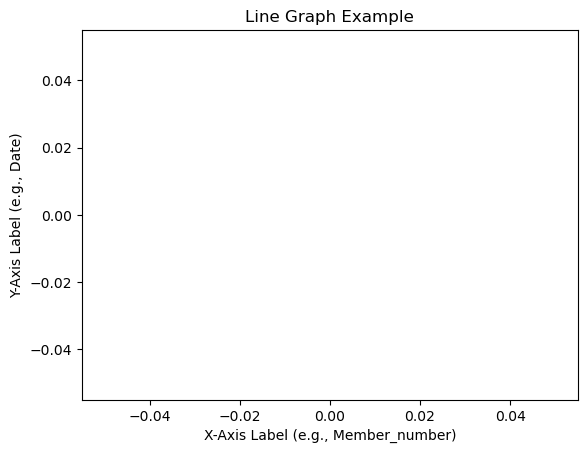

In [23]:
import matplotlib.pyplot as plt

# Sample dataset
x_values = []  # Example x-axis values (e.g., time)
y_values = []  # Example y-axis values (e.g., data points)

# Create the line plot
plt.plot(x_values, y_values)

# Add labels and title
plt.xlabel('X-Axis Label (e.g., Member_number)')
plt.ylabel('Y-Axis Label (e.g., Date)')
plt.title('Line Graph Example')

# Show the graph
plt.show()
